In [1]:
#Xゲート circuit.x(i)
#Zゲート circuit.z(i)
#Hゲート circuit.h(i)
#Yゲート circuit.y(i)
#Ryゲート circuit.ry(theta, i)
#Rzゲート circuit.rz(phi, i) 

問一：シミュレータを使う

In [2]:
# まずは全てインポート
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram


print('notebook ready')

notebook ready


In [3]:
simulator = AerSimulator()
sampler = Sampler()
print(simulator.name)

aer_simulator


In [4]:
circuits = []

##################
### EDIT BELOW ###
##################

# Circuit I - H, CX[0, 1], Ry(-π/4)[1]
circuit = QuantumCircuit(2, name='circuit_I')
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(-np.pi / 4., 1)
circuit.measure_all()
# Append to list
circuits.append(circuit)

# Circuit II - H, CX[0, 1], Ry(-3π/4)[1]
circuit = QuantumCircuit(2, name='circuit_II')
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(-3. * np.pi / 4., 1)
circuit.measure_all()
# Append to list
circuits.append(circuit)

# Circuit III - H, CX[0, 1], Ry(-π/4)[1], Ry(-π/2)[0]
circuit = QuantumCircuit(2, name='circuit_III')
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(-np.pi / 4., 1)
circuit.ry(-np.pi / 2., 0)
circuit.measure_all()
# Append to list
circuits.append(circuit)

# Circuit IV - H, CX[0, 1], Ry(-3π/4)[1], Ry(-π/2)[0]
circuit = QuantumCircuit(2, name='circuit_IV')
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(-3. * np.pi / 4., 1)
circuit.ry(-np.pi / 2., 0)
circuit.measure_all()
# Append to list
circuits.append(circuit)

# 回路のトランスパイル
transpiled_circuits = transpile(circuits, backend=simulator)

##################
### EDIT ABOVE ###
##################
# シミュレータにはショット数の制限がないので、時間の許す限りいくらでも大きい値を使っていい
shots = 10000

# 実習と同じく transpile() - 今は「おまじない」と思ってよい
circuits = transpile(circuits, backend=simulator)
# シミュレータもバックエンドと同じように振る舞うので、runメソッドで回路とショット数を受け取り、ジョブオブジェクトを返す
job = sampler.run(circuits, shots=shots)

# シミュレータから渡されたジョブオブジェクトは実機のジョブと全く同じように扱える
result = job.result()

c_arr = np.zeros(4, dtype=float)

##################
### EDIT BELOW ###
##################

for i, pub_result in enumerate(result):
    # Classical registerの名前に応じてアクセス
    # measure_all()を使用した場合、デフォルトのregister名は'meas'
    counts = pub_result.data.meas.get_counts()
    c_arr[i] = counts.get('00', 0) + counts.get('11', 0) - counts.get('01', 0) - counts.get('10', 0)

##################
### EDIT ABOVE ###
##################

c_arr /= shots

s_val = c_arr[0] - c_arr[1] + c_arr[2] + c_arr[3]
print('S =', s_val)

S = 2.8316


問題２：Ryの角度を連続的に変える


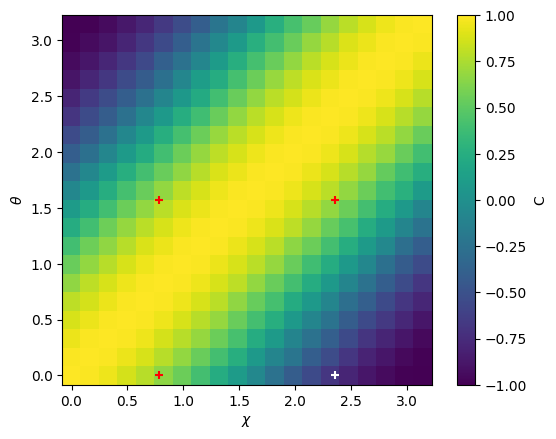

In [ ]:
# Consider 20 points each for theta and phi (400 points total)
ntheta = 20
nchi = 20

thetas = np.linspace(0., np.pi, ntheta)
chis = np.linspace(0., np.pi, nchi)

# Construct a circuit for each (theta, chi) pair
circuits = []
# np.ndindex returns an iterator over a multi-dimensional array
# -> idx = (0, 0), (0, 1), ..., (1, 0), (1, 1), ...
for idx in np.ndindex(ntheta, nchi):
    theta = thetas[idx[0]]
    chi = chis[idx[1]]

    circuit = QuantumCircuit(2, name=f'circuit_{idx[0]}_{idx[1]}')

    # Create a circuit that forms a Bell state, applies Ry gates with theta and chi
    # as arguments, and measures the state

    ##################
    ### EDIT BELOW ###
    ##################

     # ベル状態の生成
    circuit.h(0)
    circuit.cx(0, 1)

    # Ryゲートの適用
    circuit.ry(theta, 0)
    circuit.ry(chi, 1)

    ##################
    ### EDIT ABOVE ###
    ##################

    circuit.measure_all()

    circuits.append(circuit)

# Execute all circuits in Sampler and retrieve the results
shots = 10000
circuits = transpile(circuits, backend=simulator)
job = sampler.run(circuits, shots=shots)
result = job.result()
# Compute the C values for each (theta, chi)
c_values = np.zeros((ntheta, nchi), dtype=float)
for icirc, idx in enumerate(np.ndindex(ntheta, nchi)):
    # This is the counts dict for the (theta, chi) pair
    counts = result[icirc].data.meas.get_counts()

    ##################
    ### EDIT BELOW ###
    ##################

        # 期待値Cの計算
    c = counts.get('00', 0) + counts.get('11', 0) - counts.get('01', 0) - counts.get('10', 0)
    c_values[idx] = c / shots

    ##################
    ### EDIT ABOVE ###
    ##################

# Making a 2D plot using imshow()
# The theta dimension of c_values must be reversed because imshow() puts the origin at the top left corner
dtheta = (thetas[1] - thetas[0]) * 0.5
dchi = (chis[1] - chis[0]) * 0.5
plt.imshow(c_values[::-1], extent=(chis[0] - dchi, chis[-1] + dchi, thetas[0] - dtheta, thetas[-1] + dtheta))
plt.xlabel(r'$\chi$')
plt.ylabel(r'$\theta$')
plt.colorbar(label='C')
# Place markers at theta and chi values that realize |S| = 2 sqrt(2)
plt.scatter([np.pi / 4., np.pi / 4., 3. * np.pi / 4.], [0., np.pi / 2., np.pi / 2.], c='red', marker='+')
plt.scatter([3. * np.pi / 4.], [0.], c='white', marker='+')

問題３：混合状態での評価

max |S| = 2.0412


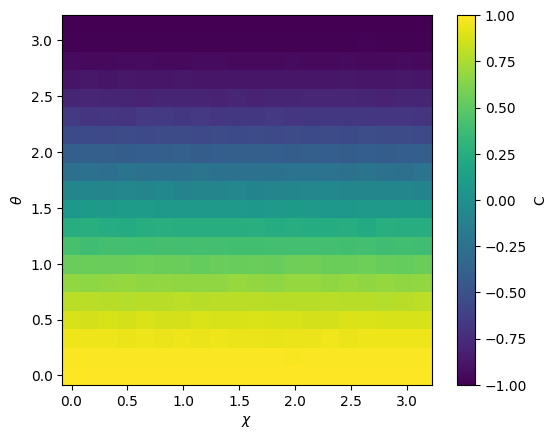

In [ ]:
# Construct a circuit for each (theta, chi) pair
circuits_ghz = []
# np.ndindex returns an iterator over a multi-dimensional array
# -> idx = (0, 0), (0, 1), ..., (1, 0), (1, 1), ...
for idx in np.ndindex(ntheta, nchi):
    theta = thetas[idx[0]]
    chi = chis[idx[1]]

    circuit = QuantumCircuit(3, name=f'circuit_{idx[0]}_{idx[1]}')

    # Create a circuit that forms a GHZ state and then measures the two qubits
    # along theta and chi bases

    ##################
    ### EDIT BELOW ###
    ##################

    # GHZ状態を作成する回路
    circuit.h(0)
    circuit.cx(0, 1)
    circuit.cx(1, 2)
    circuit.ry(theta, 1)
    circuit.ry(chi, 2)#ビット数を増やすと、図が変わる
    
    ##################
    ### EDIT ABOVE ###
    ##################

    circuit.measure_all()

    circuits_ghz.append(circuit)

# Execute all circuits in qasm_simulator and retrieve the results
circuits_ghz = transpile(circuits_ghz, backend=simulator)
sim_job_ghz = sampler.run(circuits_ghz, shots=shots)
result_ghz = sim_job_ghz.result()
def counts_ignoring_qubit2(counts, bitstring):
    """Add the counts of cases where qubit C is 0 and 1"""

    return counts.get(f'0{bitstring}', 0) + counts.get(f'1{bitstring}', 0)

# Compute the C values for each (theta, chi)
c_values_ghz = np.zeros((ntheta, nchi), dtype=float)
for icirc, idx in enumerate(np.ndindex(ntheta, nchi)):
    # This is the counts dict for the (theta, chi) pair
    counts = result_ghz[icirc].data.meas.get_counts()

    ##################
    ### EDIT BELOW ###
    ##################

    c_values_ghz[idx] = (
    counts.get('000', 0) + counts.get('011', 0) +  # C=0, AB=00 or 11
    counts.get('100', 0) + counts.get('111', 0) -  # C=1, AB=00 or 11
    counts.get('001', 0) - counts.get('010', 0) -  # C=0, AB=01 or 10
    counts.get('101', 0) - counts.get('110', 0)    # C=1, AB=01 or 10
    ) / shots

    ##################
    ### EDIT ABOVE ###
    ##################

# Making a 2D plot using imshow()
# The theta dimension of c_values must be reversed because imshow() puts the origin at the top left corner
plt.imshow(c_values_ghz[::-1], extent=(chis[0] - dchi, chis[-1] + dchi, thetas[0] - dtheta, thetas[-1] + dtheta))
plt.xlabel(r'$\chi$')
plt.ylabel(r'$\theta$')
plt.colorbar(label='C')
max_abs_s = 0.

# Use ndindex to iterate over all index combinations
for ikappa, ilambda, imu, inu in np.ndindex(ntheta, nchi, ntheta, nchi):
    abs_s = abs(c_values_ghz[ikappa, ilambda] - c_values_ghz[ikappa, inu] + c_values_ghz[imu, ilambda] + c_values_ghz[imu, inu])
    max_abs_s = max(abs_s, max_abs_s)

print(f'max |S| = {max_abs_s}')

背景1:測定既定の変換

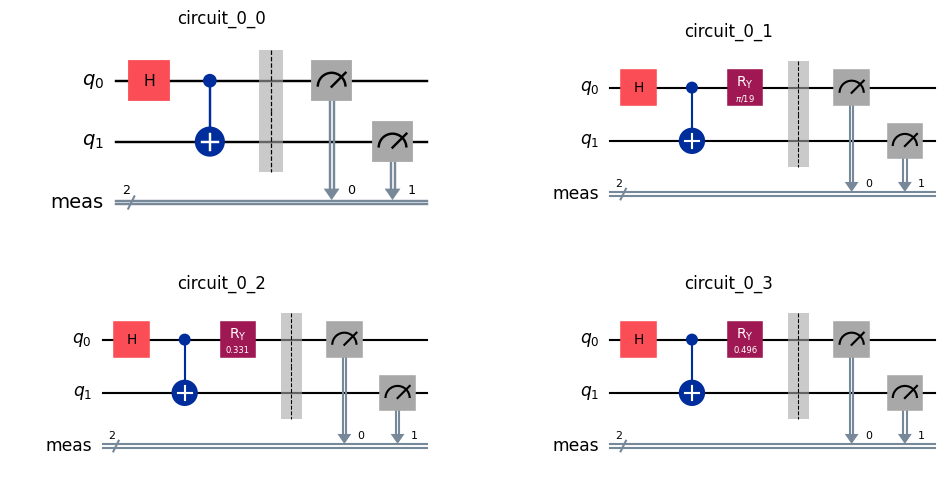

In [7]:
fig, axs = plt.subplots(2, 2, figsize=[12., 6.])
for circuit, ax in zip(circuits, axs.reshape(-1)):
    circuit.draw('mpl', ax=ax)
    ax.set_title(circuit.name)